In [10]:
import numpy as np
data = np.loadtxt("fnu.txt")
import math


In [18]:
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15

t_0 = data[:,0]
F_nu = data[:,1]


def arbitrary_eqns(t_0, F_nu):
    
    theta_0 = math.pi/18
    E_52 = 80
    n_0 = 1 
    z = 1
    theta_obs = 0.001
    theta_obs1 = theta_0
    theta_obs2 = 2*theta_0
    theta_obs3 = 3*theta_0
    theta_obs4 = 5*theta_0

    t_jetsec = (6.2*(1+z)*((E_52/n_0)**(1/3))*((theta_0/0.1)**(8/3)))*60
    
    gamma = (theta_0**(-1))*((t_0/tjet_sec)**(-1/2))         #equation for t_0 > t_jet
    
    a = 1/((1+gamma**2)*(theta_obs**2))
    a_theta = 1/((1+gamma**2)*(theta_obs1**2))
    a_2theta = 1/((1+gamma**2)*(theta_obs2**2))
    a_3theta = 1/((1+gamma**2)*(theta_obs3**2))
    a_5theta = 1/((1+gamma**2)*(theta_obs4**2))
    
    return a, a_theta, a_2theta, a_3theta, a_5theta



ValueError: x and y must have same first dimension, but have shapes (1,) and (2566,)

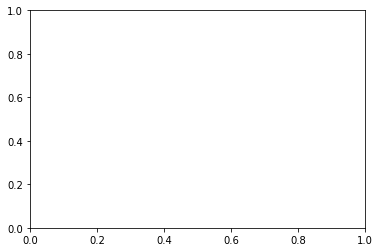

In [28]:
#The off-axis light curve with both the arbitrary frequency and time functions combined



def F(nu, t):
    
    Fnu_interp = np.interp(t, t_0, F_nu)
    
    Fnu_combined = (nu*Fnu_interp)/(nu_0)

    
    return Fnu_combined

def Foff(t_0, F_nu, nu_0):

    D = Planck15.luminosity_distance(z=1).cgs.value
    nu_0 = 1*pow(10,14)
    t_days = t_0/(86400)
    
    Fnu_off = (a**3)*F(nu_0/a, a*t_0)
    Fnu_off1 = (a_theta**3)*F(nu_0/a_theta, a_theta*t_0)         #These Fnu equations from here and below are for different theta observed values
    Fnu_off2 = (a_2theta**3)*F(nu_0/a_2theta, a_2theta*t_0)
    Fnu_off3 = (a_3theta**3)*F(nu_0/a_3theta, a_3theta*t_0)
    Fnu_off4 = (a_5theta**3)*F(nu_0/a_5theta, a_5theta*t_0)


    L_off = 4*math.pi*(D**2)*nu_0*Fnu_off
    L1_off = 4*math.pi*(D**2)*nu_0*Fnu_off1
    L2_off = 4*math.pi*(D**2)*nu_0*Fnu_off2
    L3_off = 4*math.pi*(D**2)*nu_0*Fnu_off3
    L4_off = 4*math.pi*(D**2)*nu_0*Fnu_off4
    
    plt.plot(t_days, L1_off, "r-", label='theta obs.= theta_0')
    plt.plot(t_days, L2_off, "m-", label='theta obs.= 2*theta_0')
    plt.plot(t_days, L3_off, "g-", label='theta obs.= 3*theta_0')
    plt.plot(t_days, L4_off, "c-", label='theta obs.= 5*theta_0')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Time (days)')
    plt.ylabel('Luminosity (erg/s)')
    plt.legend()
    
    return L_off, L1_off, L2_off, L3_off, L4_off

print(Foff(3*pow(10,13), 1*pow(10,10), 1*pow(10,14)))

#Luminosity Plot of various theta observed values

#plt.plot(t_days, L_off, "b-", label='theta obs.= 0')
#plt.plot(t_days, L1_off, "r-", label='theta obs.= theta_0')
#plt.plot(t_days, L2_off, "m-", label='theta obs.= 2*theta_0')
#plt.plot(t_days, L3_off, "g-", label='theta obs.= 3*theta_0')
#plt.plot(t_days, L4_off, "c-", label='theta obs.= 5*theta_0')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('Time (days)')
#plt.ylabel('Luminosity (erg/s)')
#plt.legend()
#plt.savefig("OffAxLum.png")

#plt.show()

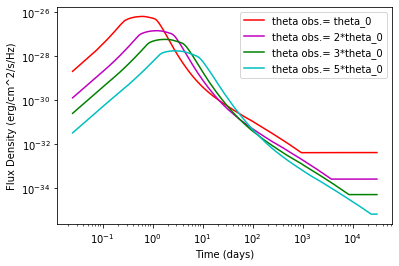

In [28]:
#Flux Density Plot of various theta observed values

#plt.plot(t_days, Fnu_off, "b-", label='theta obs.= 0')
plt.plot(t_days, Fnu_off1, "r-", label='theta obs.= theta_0')
plt.plot(t_days, Fnu_off2, "m-", label='theta obs.= 2*theta_0')
plt.plot(t_days, Fnu_off3, "g-", label='theta obs.= 3*theta_0')
plt.plot(t_days, Fnu_off4, "c-", label='theta obs.= 5*theta_0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (days)')
plt.ylabel('Flux Density (erg/cm^2/s/Hz)')
plt.legend()


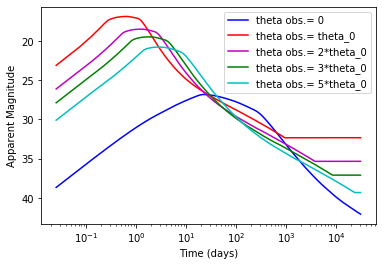

In [22]:


#Plots of apparent and absolute AB magnitudes for various theta observed values

m_AB = -2.5*np.log10(Fnu_off)-48.60
m1_AB = -2.5*np.log10(Fnu_off1)-48.60
m2_AB = -2.5*np.log10(Fnu_off2)-48.60
m3_AB = -2.5*np.log10(Fnu_off3)-48.60
m4_AB = -2.5*np.log10(Fnu_off4)-48.60

d = D*(3.24078*pow(10, -19))

M_AB = m_AB-5*np.log10(d)+5
M1_AB = m1_AB-5*np.log10(d)+5
M2_AB = m2_AB-5*np.log10(d)+5
M3_AB = m3_AB-5*np.log10(d)+5
M4_AB = m4_AB-5*np.log10(d)+5


plt.plot(t_days, m_AB, "b-", label='theta obs.= 0')         #plot of time in days vs. apparent magnitude
plt.plot(t_days, m1_AB, "r-", label='theta obs.= theta_0')
plt.plot(t_days, m2_AB, "m-", label='theta obs.= 2*theta_0')
plt.plot(t_days, m3_AB, "g-", label='theta obs.= 3*theta_0')
plt.plot(t_days, m4_AB, "c-", label='theta obs.= 5*theta_0')


plt.xlabel('Time (days)')
plt.ylabel('Apparent Magnitude')
plt.xscale('log')
plt.gca().invert_yaxis()
plt.legend()



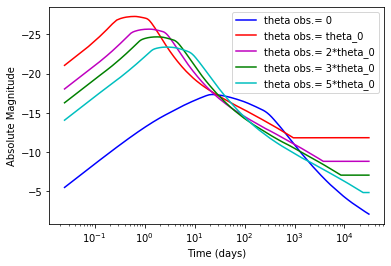

In [23]:


plt.plot(t_days, M_AB, "b-", label='theta obs.= 0')         #plot of time in days vs. absolute magnitude
plt.plot(t_days, M1_AB, "r-", label='theta obs.= theta_0')
plt.plot(t_days, M2_AB, "m-", label='theta obs.= 2*theta_0')
plt.plot(t_days, M3_AB, "g-", label='theta obs.= 3*theta_0')
plt.plot(t_days, M4_AB, "c-", label='theta obs.= 5*theta_0') 


plt.xlabel('Time (days)')
plt.ylabel('Absolute Magnitude')
plt.xscale('log')
plt.gca().invert_yaxis()
plt.legend()